In [12]:
import pandas as pd
from pandas import read_sql_query, read_sql_table
import sqlite3
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix    
import numpy as np

In [13]:
dbcon = sqlite3.connect('C:/Users/Wessel/Downloads/databestanden/databestanden/opgave1_2020.sqlite')
tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
dataframe = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}
print(dataframe)

{'dataset':        label  value_NO2 unit_NO2  value_PM10 unit_PM10  value_RH unit_RH  \
0      PZ001   48.23000    ug/m3     18.0800     ug/m3     42.91       %   
1      PZ001   33.90000    ug/m3     14.5400     ug/m3     43.68       %   
2      PZ001   33.90000    ug/m3     14.5400     ug/m3     43.68       %   
3      PZ001   17.48000    ug/m3     11.8800     ug/m3     47.70       %   
4      PZ001   17.48000    ug/m3     11.8800     ug/m3     47.70       %   
...      ...        ...      ...         ...       ...       ...     ...   
81679  PZ010    6.13131    ug/m3      2.0720     ug/m3     45.20       %   
81680  PZ001   23.82440    ug/m3     95.8600     ug/m3     91.00       %   
81681  PZ016   44.26620    ug/m3      8.7845     ug/m3     92.65       %   
81682  PZ018   19.85800    ug/m3      5.9125     ug/m3     92.00       %   
81683  PZ019    8.67473    ug/m3      2.9625     ug/m3     96.25       %   

       value_P unit_P                       time  
0      1015.00    hPa  2

In [14]:
df1 = pd.read_sql_query("SELECT * FROM dataset WHERE ((label == 'PZ020') || (label == 'PZ021') || (label == 'PZ013'))", dbcon)
print(df1.head())
print(df1['label'].count())

   label  value_NO2 unit_NO2  value_PM10 unit_PM10  value_RH unit_RH  value_P  \
0  PZ013    10.9572    ug/m3       62.76     ug/m3     69.97       %  1020.00   
1  PZ013    10.4434    ug/m3       62.76     ug/m3     63.41       %  1020.00   
2  PZ013    10.4434    ug/m3      812.24     ug/m3     72.41       %  1020.00   
3  PZ013    12.1020    ug/m3      846.31     ug/m3     72.41       %  1020.00   
4  PZ013    11.6998    ug/m3       53.97     ug/m3     72.15       %  1020.76   

  unit_P                       time  
0    hPa  2018-12-10 10:00:00+00:00  
1    hPa  2018-12-10 11:00:00+00:00  
2    hPa  2018-12-10 12:00:00+00:00  
3    hPa  2018-12-10 13:00:00+00:00  
4    hPa  2018-12-10 14:00:00+00:00  
16303


In [15]:
df = pd.read_csv('C:/Users/Wessel/Downloads/databestanden/databestanden/opgave1_2021.csv')
df = df.rename(columns={' label': 'label'})
df = df.drop(df[(df['label'] != 'PZ020') & (df['label'] != 'PZ021') & (df['label'] != 'PZ013')].index)
df



,label,value_NO2,unit_NO2,value_PM10,unit_PM10,value_RH,unit_RH,value_P,unit_P,timestamp
2,PZ013,12.48290,ug/m3,61.5542,ug/m3,85.97,%,1035.09,hPa,2020-01-01 00:00:00+00:00
5,PZ013,12.48290,ug/m3,57.8694,ug/m3,76.91,%,1035.00,hPa,2020-01-01 01:00:00+00:00
12,PZ013,11.85480,ug/m3,58.9192,ug/m3,76.91,%,1035.00,hPa,2020-01-01 02:00:00+00:00
14,PZ013,13.11070,ug/m3,53.9069,ug/m3,83.97,%,1034.00,hPa,2020-01-01 03:00:00+00:00
19,PZ013,16.88360,ug/m3,47.9381,ug/m3,85.70,%,1034.00,hPa,2020-01-01 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
22266,PZ020,2.51351,ug/m3,25.5475,ug/m3,35.24,%,1024.60,hPa,2020-04-13 10:00:00+00:00
22269,PZ013,6.11947,ug/m3,13.2555,ug/m3,44.97,%,1020.00,hPa,2021-06-04 07:00:00+00:00
22273,PZ020,2.51351,ug/m3,25.5475,ug/m3,35.24,%,1024.60,hPa,2020-04-13 10:00:00+00:00
22276,PZ013,6.11947,ug/m3,13.2555,ug/m3,44.97,%,1020.00,hPa,2021-06-04 07:00:00+00:00


In [16]:
df2 = pd.concat([df, df1], ignore_index=True)
print(df2['label'].count())
print(len(df2.columns))

26068
11


<Axes: xlabel='value_PM10', ylabel='Count'>

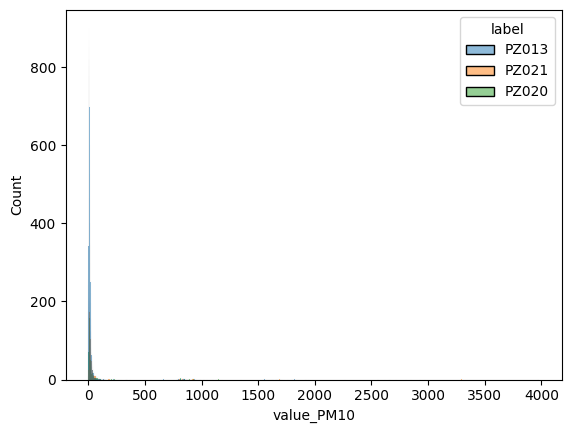

In [17]:
sns.histplot(data = df2, x="value_PM10", hue="label")

In [18]:
df_vraag2 = pd.read_csv(r"C:\Users\Wessel\Downloads\databestanden\databestanden\vraag2.csv", index_col=0)
df_vraag2.info()
df_vraag2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cijfer1    978 non-null    float64
 1   cijfer2    978 non-null    float64
 2   uren       978 non-null    int64  
 3   resultaat  978 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 38.2+ KB


,cijfer1,cijfer2,uren,resultaat
0,8.8,7.8,107,gezakt
1,9.2,7.7,100,geslaagd
2,8.6,7.1,97,gezakt
3,9.2,5.7,99,geslaagd
4,8.3,6.4,111,gezakt
...,...,...,...,...
973,9.4,6.3,124,geslaagd
974,9.2,7.3,92,geslaagd
975,9.1,6.0,93,gezakt
976,8.7,6.5,115,gezakt


In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df_vraag2.describe(include='all').transpose()
# Splitsen in dependent en independent
dep_var = df_vraag2[['resultaat']]
indep_vars=df_vraag2.drop(['resultaat'], axis=1)
dep_var.info()
indep_var_train, indep_var_test, dep_var_train, dep_var_test = train_test_split(indep_vars, dep_var, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resultaat  978 non-null    object
dtypes: object(1)
memory usage: 15.3+ KB


In [20]:
tree = DecisionTreeClassifier()
tree.fit(indep_var_train, dep_var_train)
predictions = tree.predict(indep_var_test)
accuracy = accuracy_score(dep_var_test, predictions)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.7482993197278912


In [21]:
plt.figure(figsize=(25,8))  # set plot size (denoted in inches)
clf = DecisionTreeClassifier().fit(indep_var_train, dep_var_train) 
                    
ignore_output = tree.plot_tree(clf, 
                               max_depth = 5,
                               fontsize=10,
                               filled = True, 
                               class_names = ['geslaagd', 'gezakt'], 
                               feature_names = indep_vars.columns)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

<Figure size 2500x800 with 0 Axes>

In [ ]:
cm = pd.DataFrame(confusion_matrix(dep_var_test, clf.predict(indep_var_test)), 
                 columns=['geslaagd', 'gezakt'], # LET OP: Dit is altijd in alfabetische volgorde
                 index=['geslaagd', 'gezakt'])   # LET OP: Dit is altijd in alfabetische volgorde
cm.transpose() / cm.sum(axis=1).transpose()

,geslaagd,gezakt
geslaagd,0.746575,0.216216
gezakt,0.253425,0.783784


In [ ]:
#kmeans
df_vraag3 = pd.read_csv(r"C:\Users\Wessel\Downloads\databestanden\databestanden\vraag3.csv")
df_vraag3_zonder_woonplaats = df_vraag3.drop(columns="WOONPLAATS")
print(df_vraag3_zonder_woonplaats.head())

df_vraag3_zonder_woonplaats = df_vraag3_zonder_woonplaats-df_vraag3_zonder_woonplaats.mean()
df_vraag3_zonder_woonplaats = df_vraag3_zonder_woonplaats/df_vraag3_zonder_woonplaats.std()

print(df_vraag3_zonder_woonplaats.head())


   AANSLUITINGEN_AANTAL  SOORT_AANSLUITING_PERC  SJA_GEMIDDELD  \
0                    22                   86.36        5022.73   
1                    10                  100.00        2158.20   
2                    24                   70.83        5767.75   
3                    13                   61.54        4525.00   
4                    15                   53.33        3626.40   

   SJA_LAAG_TARIEF_PERC  SLIMME_METER_PERC  
0                 47.76             100.00  
1                 41.21              90.00  
2                 46.90             100.00  
3                 41.07              92.31  
4                 56.59              93.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AANSLUITINGEN_AANTAL    10000 non-null  float64
 1   SOORT_AANSLUITING_PERC  10000 non-null  float64
 2   SJA_GEMID

c:\Users\Wessel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Wessel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Wessel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Wessel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

<Axes: >

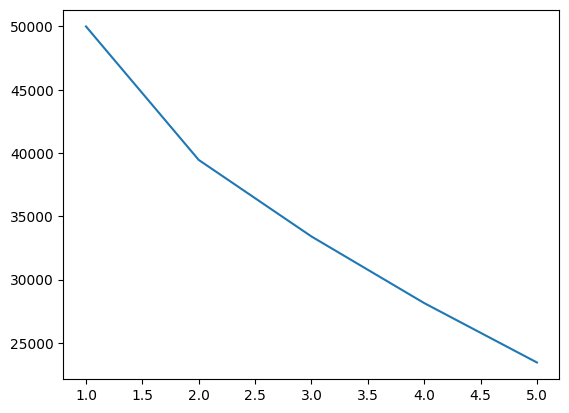

In [ ]:
from sklearn.cluster import KMeans
cluster_options = [1,2,3,4,5]
inertia_vs_no_clusters = []
for no_clusters in cluster_options:
    kmeans = KMeans(n_clusters=no_clusters)
    inertia_vs_no_clusters.append(kmeans.fit(df_vraag3_zonder_woonplaats).inertia_)
    
pd.Series(inertia_vs_no_clusters, index=cluster_options).plot()

c:\Users\Wessel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


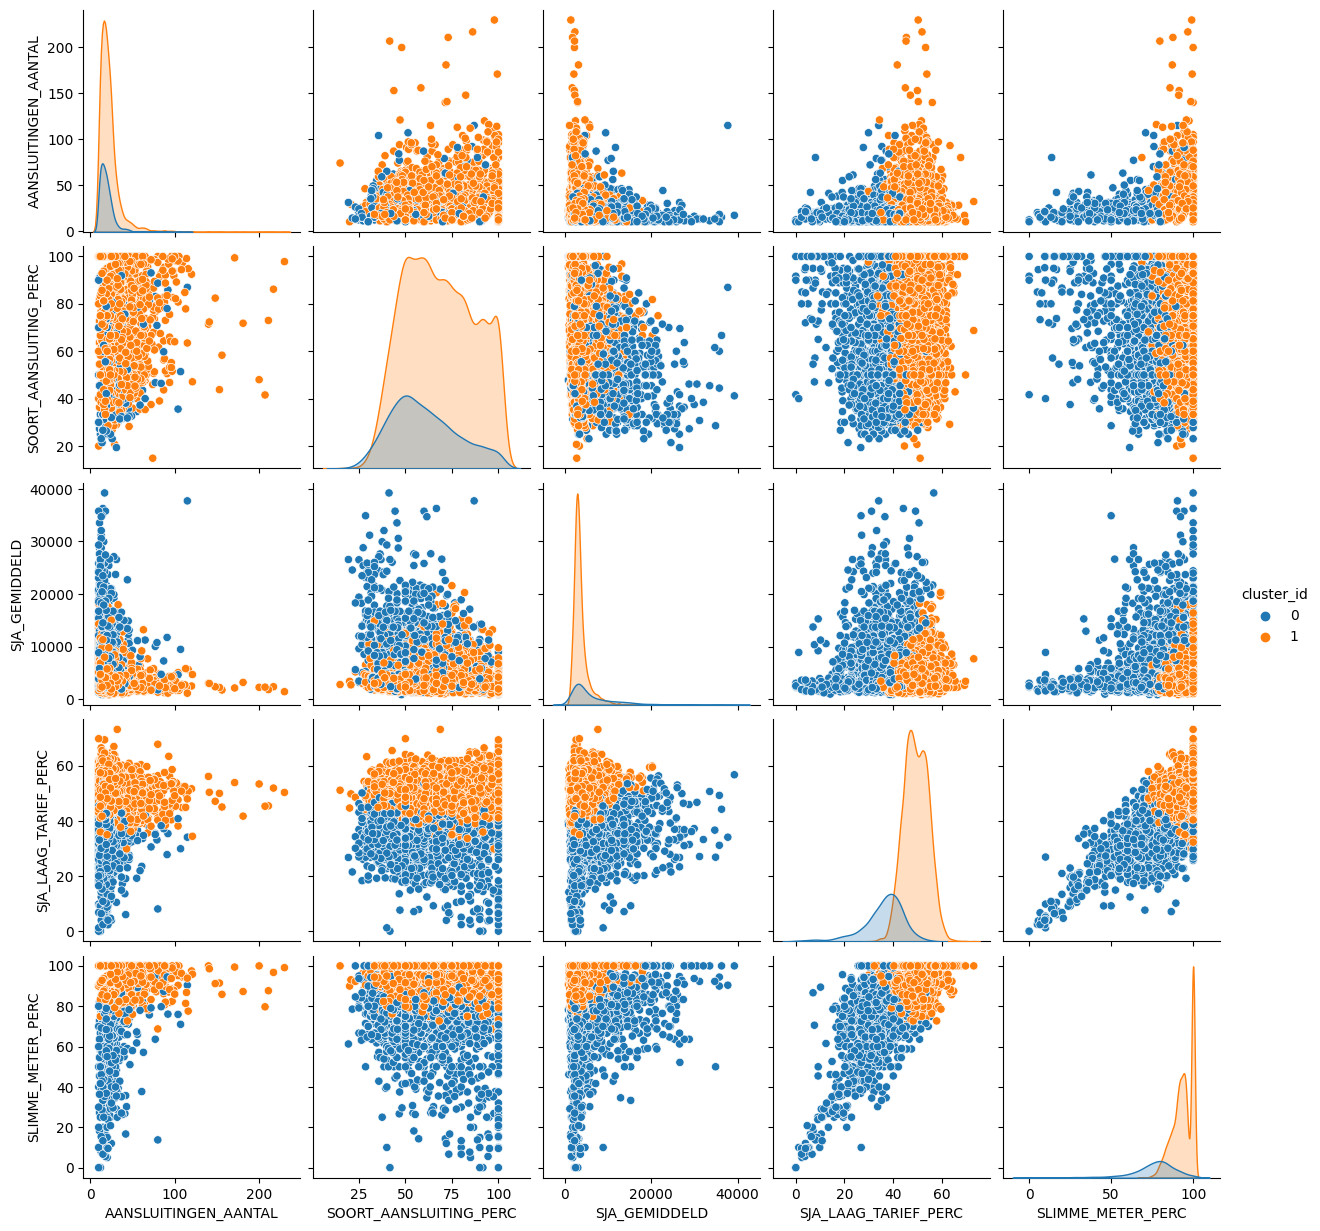

In [ ]:

model = KMeans(n_clusters=2).fit(df_vraag3_zonder_woonplaats)
df_vraag3['cluster_id'] = model.labels_
sns.pairplot(df_vraag3, hue='cluster_id')

C:\Users\Wessel\AppData\Local\Temp\ipykernel_13072\3841759316.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_vraag4.corr(), annot=True)


,Month,Height,Sex
60,47,103,Boy
110,60,106,Girl
459,39,96,Girl
379,33,95,Boy
29,53,106,Girl


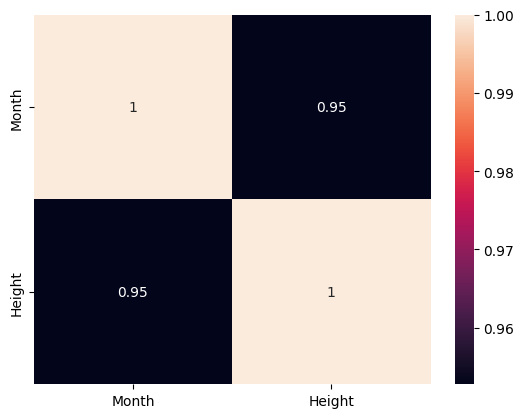

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df_vraag4 = pd.read_excel(r"C:\Users\Wessel\Downloads\databestanden\databestanden\vraag4.xlsx")
sns.heatmap(df_vraag4.corr(), annot=True)

train_data, test_data = train_test_split (df_vraag4, test_size=0.3, random_state=42)
train_data.head()


In [27]:
from statsmodels.formula.api import ols
model=ols("Height ~ Month", data=train_data).fit()
print(model.summary())
print("R-Squared on test_data:", (test_data['Height'].corr(model.predict(test_data)))**2)

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3009.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          4.06e-169
Time:                        17:28:56   Log-Likelihood:                -742.08
No. Observations:                 336   AIC:                             1488.
Df Residuals:                     334   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8779      0.494    147.559      0.0

In [28]:
model=ols("Height ~ Month + C(Sex)", data=train_data).fit()
print(model.summary())
print("R-Squared on test_data:", (test_data['Height'].corr(model.predict(test_data)))**2)

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1545.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          3.08e-169
Time:                        17:49:26   Log-Likelihood:                -737.53
No. Observations:                 336   AIC:                             1481.
Df Residuals:                     333   BIC:                             1493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         73.1850      0.498    146.